In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [85]:
#Problems 18 and 67

nums="""75
95 64
17 47 82
18 35 87 10
20 04 82 47 65
19 01 23 75 03 34
88 02 77 73 07 63 67
99 65 04 28 06 16 70 92
41 41 26 56 83 40 80 70 33
41 48 72 33 47 32 37 16 94 29
53 71 44 65 25 43 91 52 97 51 14
70 11 33 28 77 73 17 78 39 68 17 57
91 71 52 38 17 14 91 43 58 50 27 29 48
63 66 04 68 89 53 67 30 73 16 69 87 40 31
04 62 98 27 23 09 70 98 73 93 38 53 60 04 23"""

nums=nums.split('\n')
nums=[x.split() for x in nums]
new_nums=[]
for x in nums:
    new_nums.append([])
    for y in x:
        new_nums[-1].append(int(y))
nums=new_nums

prev_row=nums[0]
curr_row=[]
for row in nums[1:]:
    curr_row=[]
    for item in range(len(row)):
        if item==0:
            curr_row.append(row[item]+prev_row[0])
        elif item==len(prev_row):
            curr_row.append(row[item]+prev_row[-1])
        elif prev_row[item]>prev_row[item-1]:
            curr_row.append(row[item]+prev_row[item])
        else:
            curr_row.append(row[item]+prev_row[item-1])
    prev_row=curr_row
print max(curr_row)

1074


In [109]:
# Problem 21
def find_divisors_sum(num):
    divisors=[]
    if num%2==0:
        #it is even; we can use evens and odds
        for curr in range(1,(num/2)+1):
            if num%curr==0:
                divisors.append(curr)
    else:
        #it is odd; we can't use evens
        for curr in range(1,(num/2)+1,2):
            if num%curr==0:
                divisors.append(curr)
    return sum(divisors)


amicable=[]
for num in range(10000):
    if num not in amicable:
        temp_sum=find_divisors_sum(num)
        if (find_divisors_sum(temp_sum)==num) and (temp_sum!=num):
            amicable.append(num)
            
sum(amicable)

31626

In [45]:
# Problem 62

cubed=lambda x: x**3
numbers_dict={}
for i in range(20000):
    num_slots=[0]*10
    cubed_num=str(cubed(i))
    for j in range(10):
        num_slots[j]=cubed_num.count(str(j))
    dict_key=''
    for j in num_slots:
        dict_key+=str(j)
    if dict_key in numbers_dict.keys():
        prev_values=numbers_dict[dict_key]
        prev_values[0]+=1
        numbers_dict[dict_key]=prev_values
    else:
        numbers_dict[dict_key]=[1,i]

criteria_met_list=[]
for values in numbers_dict.values():
    if values[0]>4:
        criteria_met_list.append(values[1])
print min(criteria_met_list)**3

127035954683


In [4]:
# Problem 84 - Monopoly Odds
import numpy as np

def dice_roll():
    return [x for x in np.random.randint(1,7,2)]
    
def choose_util(i):
    if i<12:
        return '12'
    elif i<28:
        return '28'
    return '12'

class monopoly():
    
    def __init__(self):
        self.player_position='00'
        self.seed=np.random.randint(1,1000000)
        self.cc_i=0
        self.ch_i=0
        
    def next_turn(self):
        board=['0'+str(x) if len(str(x))==1 else str(x) for x in range(40)]
        spaces_visited=[]
        doubles_count=0
        boolean_value=True
        while boolean_value:
            roll=dice_roll()
            next_space=roll[0]+roll[1]+int(self.player_position)
            if next_space>=40:
                next_space+=-40
            next_space=str(next_space)
            if len(next_space)==1:
                next_space='0'+next_space
            if roll[0]==roll[1]:
                doubles_count+=1
            if doubles_count==3:
                spaces_visited.append('10')
                self.player_position='10'
                boolean_value=False
            else:
                    # Community Chest
                if next_space in ['02','17','33']:
                    cards=[next_space]
                    cards=cards*14
                    cards.extend(['00','10'])
                    np.random.seed(self.seed)
                    cards=np.random.permutation(cards)
                    next_cc_i=self.cc_i+1
                    if next_cc_i>15:
                        next_cc_i=0
                    proposed_space=cards[self.cc_i]
                    self.cc_i=next_cc_i
                    if proposed_space!=next_space:
                        if proposed_space=='10': # Going to Jail
                            spaces_visited.append('10')
                            self.player_position=proposed_space
                            boolean_value=False
                        else:  # Not going to Jail
                            spaces_visited.append(proposed_space)
                            self.player_position=proposed_space
                    else:
                        spaces_visited.append(next_space)
                        self.player_position=next_space
                            
                    # Chance
                elif next_space in ['07','22','36']: 
                    i=next_space
                    cards=[i]
                    cards=cards*6
                    cards.extend(['00','10','11','24','39','05',\
                                  str(int(i)/10*10+5),str(int(i)/10*10+5),choose_util(int(i)),str(int(i)-3)])
                    np.random.seed(self.seed)
                    cards=np.random.permutation(cards)
                    next_ch_i=self.ch_i+1
                    if next_ch_i>15:
                        next_ch_i=0
                    proposed_space=cards[self.ch_i]
                    self.ch_i=next_ch_i
                    if proposed_space!=next_space:
                        if proposed_space=='10': # Going to Jail
                            spaces_visited.append('10')
                            self.player_position=proposed_space
                            boolean_value=False
                        else:  # Not going to Jail
                            spaces_visited.append(proposed_space)
                            self.player_position=proposed_space
                    else:
                        spaces_visited.append(next_space)
                        self.player_position=next_space
                        
                    # Neither
                else:
                    spaces_visited.append(next_space)
                    self.player_position=next_space
            if roll[0]!=roll[1]:
                boolean_value=False
        return spaces_visited

In [ ]:
spaces_visited=[]
trials=1000
games=1000
for i in range(games):
    thing=monopoly()
    for i in range(trials):
        spaces=thing.next_turn()
        for i in range(len(spaces)):
            if len(spaces[i])==1:
                spaces[i]='0'+spaces[i]
        spaces_visited.extend(spaces)

space_count=[]
for i in range(40):
    x=i
    if len(str(x))==1:
        x='0'+str(x)  
    else: 
        x=str(x)
    space_count.append([i,spaces_visited.count(x)/float(trials*games)])
space_count.sort(key=lambda x: x[1],reverse=True)
space_count[:4]

In [ ]:
space_count

In [455]:
# Problem 85 - Counting Rectangles
side1=0
side2=0
rectangles=1900000
for i in range(1,500):
    for j in range(i,500):
        temp=np.sum(range(1,i+1))*np.sum(range(1,j+1))
        if np.abs(temp-2000000)<np.abs(rectangles-2000000):
            print temp,i,j,i*j
            rectangles=temp
            side1=i
            side2=j

1901025 6 425 2550
1909971 6 426 2556
1918938 6 427 2562
1927926 6 428 2568
1936935 6 429 2574
1945965 6 430 2580
1955016 6 431 2586
1964088 6 432 2592
1973181 6 433 2598
1982295 6 434 2604
1991430 6 435 2610
2000586 6 436 2616
2000016 16 171 2736
1999998 36 77 2772


In [ ]:
# Problem 88 - Product-sum Numbers



In [469]:
# Problem 209 -Circular Logic
tables_that_equal_zero=0
table1=[]
table2=[]
for i1 in range(2):
    for i2 in range(2):
        for i3 in range(2):
            for i4 in range(2):
                for i5 in range(2):
                    for i6 in range(2):
                        table1=[i1,i2,i3,i4,i5,i6]
                        final_element=0
                        if (i2==1) and (i3==1):
                            if i1==0:
                                final_element=1
                        elif i1==1:
                            final_element=1
                        table2=[i2,i3,i4,i5,i6,final_element]
                        and_table=[1 if (x==1) and (y==1) else 0 for x,y in zip(table1,table2)]
                        if sum(and_table)==0:
                            tables_that_equal_zero+=1
                            print table1,table2,and_table
print tables_that_equal_zero

[0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1] [0, 0, 0, 0, 1, 0] [0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0] [0, 0, 0, 1, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0] [0, 0, 1, 0, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 1] [0, 0, 1, 0, 1, 0] [0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0] [0, 1, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 1] [0, 1, 0, 0, 1, 0] [0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0] [0, 1, 0, 1, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 1] [1, 0, 0, 0, 1, 0] [0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 1, 0] [1, 0, 0, 1, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 0] [1, 0, 1, 0, 0, 0] [0, 0, 0, 0, 0, 0]
[0, 1, 0, 1, 0, 1] [1, 0, 1, 0, 1, 0] [0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0] [0, 0, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 1, 0] [0, 0, 0, 1, 0, 1] [0, 0, 0, 0, 0, 0]
[1, 0, 0, 1, 0, 0] [0, 0, 1, 0, 0, 1] [0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0] [0, 1, 0, 0, 0, 1] [0, 0, 0, 0, 0, 0]
[1, 0, 1, 0, 1, 0] [0, 1, 0, 1,

In [49]:
# Problem 31 - Coin Sums
coin_options=[1,2,5,10,20,50,100,200]
closed_combinations=[[200]]
open_combinations=[[x] for x in coin_options]
go_throughs=0
while len(open_combinations)>0:
    new_open_combinations=[]
    for combination in open_combinations:
        # We can eliminate many duplicates by simply requiring the coin sums to be of equal or greater value than
        # the most previous one
        i=coin_options.index(combination[-1])
        go_throughs+=1
        while i < len(coin_options):
            coin=coin_options[i]
            if (coin+sum(combination))<200:
                hold=[x for x in combination]
                hold.append(coin)
                new_open_combinations.append(hold)
                i+=1
            elif (coin+sum(combination))==200:
                hold=[x for x in combination]
                hold.append(coin)
                closed_combinations.append(hold)
                i=10
            else:
                i=10
    open_combinations=new_open_combinations
print "Reviewed %s possible combinations" %go_throughs

Reviewed 2813044 possible combinations


In [48]:
coin_amounts=[]
for coins in closed_combinations:
    coin_amounts.append([coins.count(1),coins.count(2),coins.count(5),coins.count(10),coins.count(20),coins.count(50),
                    coins.count(100),coins.count(200)])
len(pd.DataFrame(coin_amounts,columns=[str(x) for x in coin_options]).drop_duplicates())

73682

In [76]:
# Problem 78 - Coin Partitions
coin_combinations={}
coin_combinations[1]=1
coin_combinations[2]=2
coin_combinations[3]=3
coin_combinations[4]=5
coin_combinations[5]=7
boolean_value=True
i=6
while boolean_value:
    value_check=coin_combinations[i-2]*2+1
    if value_check>1000000:
        print i
        boolean_value=False
    coin_combinations[i]=value_check
    i+=1

39


In [75]:
coin_combinations[103]

4503599627370495

In [22]:
# Problem 33

abnormal_fractions=[]
for i in range(10,100):
    for j in range(i,100):
        if int(str(j)[-1])!=0:
            if int(str(i)[0])!=int(str(i)[1]):
                if str(i)[-1]==str(j)[0]:
                    if (i/float(j))==(int(str(i)[0])/float(str(j)[-1])):
                        print i,j
                        abnormal_fractions.append([i,j])
abnormal_fractions=np.array(abnormal_fractions).T
np.product(abnormal_fractions[0])/float(np.product(abnormal_fractions[1]))

16 64
19 95
26 65
49 98


0.01

In [23]:
# Problem 40
digits=[]
digit_number=0
slots=[1,10,100,1000,10000,100000,1000000]
for i in range(1,1000000):
    for j in range(len(str(i))):
        digit_number+=1
        if digit_number in slots:
            digits.append(int(str(i)[j]))
np.product(digits)

210

In [130]:
# Problem 107
df=pd.read_csv('https://projecteuler.net/project/resources/p107_network.txt',header=None)
df.iloc[0].to_frame().T
df=df.replace('-',10000)
for col in df.columns:
    df[col]=df[col].astype(int)
    
vertices_list=[39]
edge_list=[]
while len(vertices_list)<len(df.columns):
    col_min=0
    row_min=0
    val_min=10000
    for col in vertices_list:
        for row in df.index:
            if row not in vertices_list:
                if df.loc[row,col]<=val_min:
                    val_min=df.loc[row,col]
                    col_min=col
                    row_min=row
#     print row_min,col_min,val_min
    vertices_list.append(row_min)
    edge_list.append(val_min)
    
# Problem 107
df=pd.read_csv('https://projecteuler.net/project/resources/p107_network.txt',header=None)
df.iloc[0].to_frame().T
df=df.replace('-',0)
for col in df.columns:
    df[col]=df[col].astype(int)
print sum(edge_list)
sum(sum(df.values))/2-np.sum(edge_list)

2153


259679.0

In [167]:
# Problem 109 - Darts

singles=range(21)
singles.append(25)
throws_dict={'S'+str(x):x for x in singles}
doubles=range(0,42,2)
doubles.append(50)
for x in singles:
    throws_dict['D'+str(x)]=x*2 
triples=range(0,63,3)
for x in singles[:-1]:
    throws_dict['T'+str(x)]=x*3
ending_throws=doubles[1:]
singles=singles[1:]

def make_combinations(init_throw,threshold,combinations=[]):
    new_combinations=[]
    finished_combinations=[]
    if len(combinations)==0:
        if init_throw==threshold:
            finished_combinations.append(["D"+str(init_throw/2)])
        for throw in throws_dict.keys():
            if (throws_dict[throw]+init_throw)<threshold:
                curr_comb=["D"+str(init_throw/2),throw]
                new_combinations.append(curr_comb)
            elif (throws_dict[throw]+init_throw)==threshold:
                curr_comb=["D"+str(init_throw/2),throw]
                finished_combinations.append(curr_comb) # <<<<<------
    else:
        for combination in combinations:
            for throw in throws_dict.keys():
                curr_comb=[x for x in combination]
                curr_size=np.sum([throws_dict[x] for x in combination])
                if throws_dict[throw]+curr_size<threshold:
                    if len(curr_comb)+1<3:
                        curr_comb.append(throw)
                        new_combinations.append(curr_comb)
                elif throws_dict[throw]+curr_size==threshold:
                    curr_comb.append(throw)
                    if len(curr_comb)<=3:
                        finished_combinations.append(curr_comb)  # <<<<<----
    if len(new_combinations)>0:
        finished_combinations.extend(make_combinations(init_throw,threshold,new_combinations))
    return finished_combinations

all_combos=[]
for i in range(1,100):
    print i,
    for ending_throw in ending_throws:
        temp=make_combinations(ending_throw,i)
        if len(temp)>0:
            all_combos.extend(temp)

print 
combos_dict={}
for combo in all_combos:
    temp=[x for x in combo]
    if len(temp)>1:
        hold=[temp[0]]
        temp=temp[1:]
        temp.sort()
        hold.extend(temp)
        temp=hold
    temp_str=""
    for element in temp:
        if element[1]!='0':
            temp_str+=element
    combos_dict[temp_str]=1
print len(combos_dict.keys())


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
38182


In [209]:
# Problem 206 - Concealed Square

for i in range(1399004842,1009402876,-2):
    if i==1059402876:
        print i,
    if i==1109402876:
        print i,
    if i==1159402876:
        print i,
    if i==1209402876:
        print i,
    if i==1259402876:
        print i,
    if i==1309402876:
        print i,
    if i==1359402876:
        print i,
    temp=str(i**2)
    if (temp[0]=='1') and (temp[2]=='2') and (temp[4]=='3') and (temp[6]=='4') and (temp[8]=='5')\
    and (temp[10]=='6') and (temp[12]=='7') and (temp[14]=='8') and (temp[16]=='9') and (temp[18]=='0'):
        print 
        print 'DONE:',
        print i
        break


DONE: 1389019170


In [220]:
# Problem 112 - Bouncy Numbers

bouncy=0
total=0
for i in range(1,10000000):
    temp=str(i)
    if len(temp)<=2:
        total+=1
    else:
        up=0
        down=0
        for element in range(len(temp)-1):
            if int(temp[element])>int(temp[element+1]):
                down+=1
            elif int(temp[element])<int(temp[element+1]):
                up+=1
        if (up>0) and (down>0):
            bouncy+=1
        total+=1
    if bouncy/float(total)==0.99:
        print bouncy,total
        print bouncy/float(total)
        break

1571130 1587000
0.99


In [99]:
# Problem 148 - Exploring Pascal's Triangle

def create_row(prior_row,row_len):
    if row_len==1:
        next_row=[1,1]
    else:
        next_row=[1]
        for element in range(row_len-1):
            next_row.append(prior_row[element]+prior_row[element+1])
        next_row.append(1)
    return next_row

def divisible_by_seven(row,counter,total,series):
    second_counter=0
    for element in row:
        total+=1
        if element%7==0:
            counter+=1
            second_counter+=1
    series.append(second_counter),
    return counter,total,series

divisible_series=[]
curr_row=[[1]]
total_elements=1
divisible_elements=0
row_len=1
for i in range(1,7500):
    prev_row=curr_row
    curr_row=create_row(prev_row,row_len)
    row_len+=1
    divisible_elements,total_elements,divisible_series=divisible_by_seven(curr_row,divisible_elements,total_elements,\
                                                                        divisible_series)
print "Divisible:    ",divisible_elements
print "Not Divisible:",total_elements-divisible_elements
print "Total: ",total_elements

Divisible:     24374790
Not Divisible: 3753960
Total:  28128750


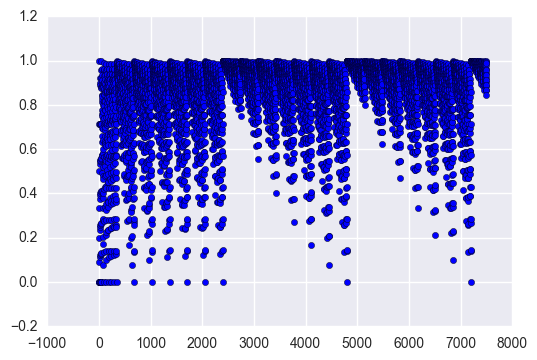

In [116]:
plt.scatter(range(3,len(divisible_series)),[x/float(y-2) for x,y in zip(divisible_series[3:],range(5,7501))])
plt.show()

In [77]:
# #### Does not work (something to do with numpy)

# # Problem 148 - Exploring Pascal's Triangle

# def create_row(prior_row,row_len):
#     if row_len==1:
#         next_row=[1,1]
#     else:
#         next_row=[1]
# #         for element in range(row_len-1):
# #             next_row.append(prior_row[element]+prior_row[element+1])
# #         next_row.append(1)
        
#         temp_row=np.insert(prior_row[:-1],[0],0)
#         next_row=np.add(temp_row,prior_row)
#         next_row=np.insert(next_row,[row_len],1)
#     return [x for x in next_row]

# def divisible_by_seven(row,counter,total):
#     for element in row:
#         total+=1
#         if element%7==0:
#             counter+=1
#     return counter,total


# curr_row=[1]
# total_elements=1
# divisible_elements=0
# row_len=1
# for i in range(1,100):
#     prev_row=curr_row
#     curr_row=create_row(prev_row,row_len)
#     row_len+=1
#     total_elements+=row_len
#     divisible_elements+=row_len-np.count_nonzero(np.array(curr_row)%7)
# print "Divisible:    ",divisible_elements
# print "Not Divisible:",total_elements-divisible_elements
# print "Total: ",total_elements



# #     divisible_elements,total_elements=divisible_by_seven(curr_row,divisible_elements,total_elements)

In [36]:
l1=[0,1,1,2,3,5,6,7,8]
l2=[3,4,4,4,4,5,5,6,7,8,9,12]

In [39]:
new_list=[min(l1[0],l2[0])]
i,j=0,0
while i<len(l1) or j<len(l2):
    if i>=len(l1):
        if l2[j]!=new_list[-1]:
            new_list.append(l2[j])
        j+=1
    elif j>=len(l2):
        if l1[i]!=new_list[-1]:
            new_list.append(l1[i])
        i+=1
    elif l1[i]>l2[j]:
        if l2[j]!=new_list[-1]:
            new_list.append(l2[j])
        j+=1
    else: 
        if l1[i]!=new_list[-1]:
            new_list.append(l1[i])
        i+=1
print new_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12]
